In [ ]:
# pip install matplotlib

#Reading the Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


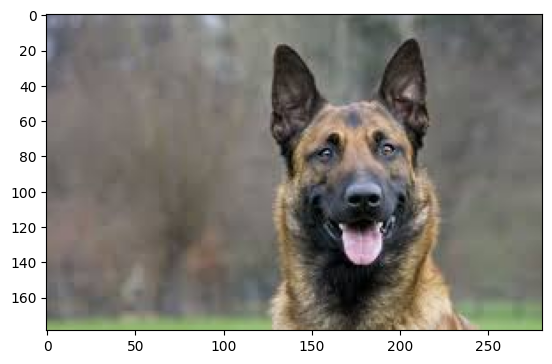

In [ ]:
from PIL import Image
# import matplotlib.pyplot as plt

InputImg = Image.open("/content/drive/MyDrive/chien.jpeg")

import matplotlib.pyplot as plt
plt.imshow(InputImg)

##Transforms According to ResNet and AlexNet

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

##Applying the Transforms to the Input Image

In [ ]:
Transformed_InputImg = transform(InputImg)

##Analyzing the shape of the Image

In [ ]:
print(Transformed_InputImg.shape)

torch.Size([3, 224, 224])


##Converting Data Into the Batch Format

In [ ]:
import torch
InputImg_Batched = torch.unsqueeze(Transformed_InputImg, 0)

In [ ]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


# Single-Label Classification Using ResNet AlexNet

##**1. ResNet Model**

In [ ]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

###Loading the ResNet101 Model

In [ ]:
resnet = models.resnet101(pretrained = True)

#activating the evaluation mode after this we can feed it to the input
resnet.eval()

#We will feed the batch format input image to the resnet

output = resnet(InputImg_Batched)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 105MB/s] 


###Read the ImageNet Classes Text file from Google Drive (When using Google Colab)

In [ ]:
with open('/content/drive/MyDrive/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]




###Predicting the Output Index of the Class

In [ ]:
_, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

225: 'malinois', 95.38481140136719


##**2. AlexNet Model**

In [ ]:
alexnet = models.alexnet(pretrained = True)
alexnet.eval()
out = alexnet(InputImg_Batched)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 52.1MB/s]


###Read the ImageNet Classes Text file from Google Drive (When using Google Colab)

In [ ]:
with open('/content/drive/MyDrive/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]

###Predicting the Output Index of the Class

In [ ]:
_, predicted = torch.max(out, 1)
percentage = torch.softmax(out, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

235: 'German shepherd, German shepherd dog, German police dog, alsatian', 82.95640563964844


# Multi-Label Classification Using ResNet and AlexNet

### Reading the Image from Google Drive

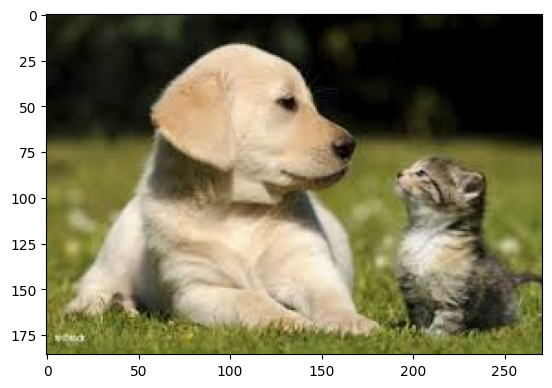

In [ ]:
from PIL import Image
# import matplotlib.pyplot as plt

InputImg_ = Image.open("/content/drive/MyDrive/chat.jpeg")

import matplotlib.pyplot as plt
plt.imshow(InputImg_)

###Applying the Transforms aaccording to the ResNet and AlexNet Model

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

###Applying the transform to the Input Image

In [ ]:
Transformed_InputImg_ = transform(InputImg_)

###Analyzing the Shape of the Image

In [ ]:
print(Transformed_InputImg_.shape)

torch.Size([3, 224, 224])


###Converting the Input Image to Batch Format

In [ ]:
import torch
InputImg_Batched_ = torch.unsqueeze(Transformed_InputImg_, 0)

###Analyzing the Shape of the Batched Input Image

In [ ]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


##**1. ResNet Model**

In [ ]:
from torchvision import models

resnet = models.resnet152(pretrained=True)
resnet.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 92.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
Output_ = resnet(InputImg_Batched_)

###Reading the Class Label from the Google Drive

In [ ]:
with open('/content/drive/MyDrive/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]

###Predicting the Label for the Input Image

In [ ]:
_, predictedLabels = torch.sort(output, descending = True)

Percentage = torch.sigmoid(output)[0] * 100

[(ImageNetClasses[index], Percentage[index].item()) for index in predictedLabels[0][:5]]

[("225: 'malinois',", 99.99993896484375),
 ("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  99.99832153320312),
 ("255: 'Leonberg',", 99.93885803222656),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 99.92530822753906),
 ("227: 'kelpie',", 99.92412567138672)]

##**2.AlexNet**

In [ ]:
alexnet = models.alexnet(pretrained = True)
alexnet.eval()

out_ = alexnet(InputImg_Batched_)

### Reading the Class Labels from the Text file from Google Drive

In [ ]:
with open('/content/drive/MyDrive/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]

### Predicting the Label of the Animal

In [ ]:
_, predictedLabels = torch.sort(output, descending = True)

Percentage = torch.sigmoid(output)[0] * 100

[(ImageNetClasses[index], Percentage[index].item()) for index in predictedLabels[0][:5]]

[("225: 'malinois',", 99.99993896484375),
 ("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  99.99832153320312),
 ("255: 'Leonberg',", 99.93885803222656),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 99.92530822753906),
 ("227: 'kelpie',", 99.92412567138672)]